## 导入对应的包

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/data.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## 可视化数据

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]


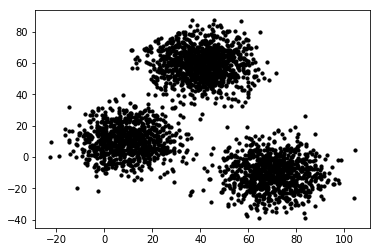

In [35]:
f1 = data['V1'].values
f2 = data['V2'].values
f_data = np.array(list(zip(f1, f2)), dtype=np.float32)
plt.scatter(f1, f2, c='black', s=10)

## K-means 里的 K 值

[[100.  48.]
 [ 59.  12.]
 [  1.  34.]]


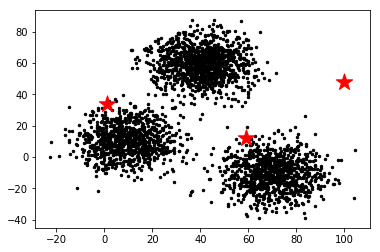

In [42]:
K = 3
Cx = np.random.randint(0, np.max(f_data), size=K)
Cy = np.random.randint(0, np.max(f_data), size=K)
C = np.array(list(zip(Cx, Cy)), dtype=np.float32)
print(C)
plt.scatter(f1, f2, c='black', s=6)
plt.scatter(C[:,0], C[:,1], marker='*', s=300, c='r')

####  np.linalg.norm(x1-x2, ord=None, axis=None, keepdims=False)
- x1-x2：两个点（向量）各个维度上的差
- ord：求哪一种距离，默认为 2(欧式距离), 1(曼哈顿距离), 其它: 切尔切比雪夫距离。它是各个坐标距离的最大值。
- axis：取值 0 或 1，0 表示按列向量处理，求多个列向量的范数。默认为 0
- keepding：是否保持矩阵的二维特性，默认为 False


#### np.mean(a, axis=None,...)
- axis 不设置值，对 m*n 个数求均值，返回一个实数
- axis = 0：压缩行，对各列求均值，返回 1* n 矩阵
- axis =1 ：压缩列，对各行求均值，返回 m *1 矩阵

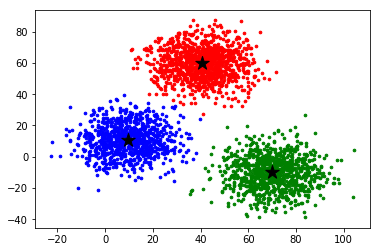

In [45]:
C_zeros = np.zeros(C.shape)
clusters = np.zeros(len(f_data))

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

error = dist(C, C_zeros, None)

# 循环算法
while error != 0:
    # 存储每一个距离的中心点的距离
    for i in range(len(f_data)):
        distances = dist(f_data[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    C_old = deepcopy(C)
    # 计算新的中心点, 取平均值
    for i in range(K):
        points = [f_data[j] for j in range(len(f_data)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b']

fig, ax = plt.subplots()

for i in range(K):
    points = np.array([f_data[j] for j in range(len(f_data)) if clusters[j]==i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='black')